# Exploring the MNIST Digits Dataset

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2024-11-08 06:38:55.429932: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 06:38:55.474566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 06:38:55.474600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 06:38:55.476087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 06:38:55.482716: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 06:38:55.483226: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Exploring Data

In [2]:
# check shape of the data

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


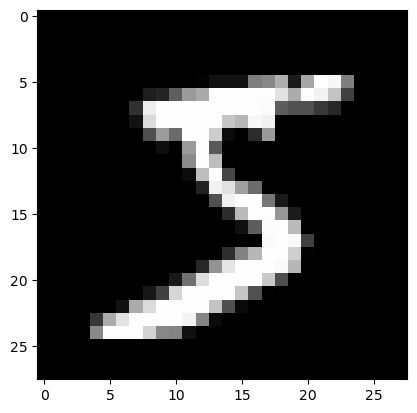

correct number: 5


In [3]:
# visualize single data instances

img_no = 0 #change the number to display other examples

first_number = x_train[img_no]
plt.imshow(first_number, cmap='gray') # visualize the numbers in gray mode
plt.show()
print(f"correct number: {y_train[img_no]}")

## Preparing Data & Splitting

In [4]:
# reshaping the data
# reshaping pixels in a 28x28px image with greyscale, canal = 1. This is needed for the Keras API
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# normalizing the data
# each pixel has a value between 0-255. Here we divide by 255, to get values from 0-1
x_train = x_train / 255
x_test = x_test / 255

print(f"train X shape: {x_train.shape}")
print(f"test X shape: {x_test.shape}")

train X shape: (60000, 28, 28, 1)
test X shape: (10000, 28, 28, 1)


## Model Building

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax')) #output are 10 classes, numbers from 0-9

#show model summary - how it looks
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [6]:
#compile the model - we want to have a multiple outcome
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [7]:
#fit the model and return the history while training
history = model.fit(
  x=x_train,
  y=y_train,
  epochs=10
)

Epoch 1/10


2024-11-07 16:53:48.439666: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 162s 86ms/step - loss: 0.2260 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0752 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 157s 83ms/step - loss: 0.0552 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0451 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 152s 81ms

## Model Evaluation

In [8]:
keras.models.save_model(model,"models/detect-digits")

INFO:tensorflow:Assets written to: models/detect-digits/assets


INFO:tensorflow:Assets written to: models/detect-digits/assets


In [8]:
from minio import Minio
import os

minio_client = Minio(
        "10.105.102.160:9000",
        access_key="minio",
        secret_key="minio123",
        secure=False
    )
minio_bucket = "mlpipeline"

import glob

def upload_local_directory_to_minio(local_path, bucket_name, minio_path):
    assert os.path.isdir(local_path)

    for local_file in glob.glob(local_path + '/**'):
        local_file = local_file.replace(os.sep, "/") # Replace \ with / on Windows
        if not os.path.isfile(local_file):
            upload_local_directory_to_minio(
                local_file, bucket_name, minio_path + "/" + os.path.basename(local_file))
        else:
            remote_path = os.path.join(
                minio_path, local_file[1 + len(local_path):])
            remote_path = remote_path.replace(
                os.sep, "/")  # Replace \ with / on Windows
            minio_client.fput_object(bucket_name, remote_path, local_file)
            
upload_local_directory_to_minio("models/detect-digits",minio_bucket,"models/detect-digits")

# Creating dataset directory if it doesn't exist
os.makedirs("dataset", exist_ok=True)
# Save the dataset as .npz files locally
np.savez_compressed("./dataset/mnist.npz", x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
# Upload the dataset to MinIO
minio_client.fput_object(
    bucket_name=minio_bucket,
    file_path="dataset/mnist.npz",
    object_name="mnist.npz",
)

In [8]:
from tensorflow import keras
#load model if already trained
model = keras.models.load_model("detect-digits.h5")
# keras.models.save_model(model,"detect-digits.h5")

In [9]:
# Test the model against the test dataset
# Returns the loss value & metrics values for the model in test mode.
model_loss, model_accuracy = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0664 - accuracy: 0.9869


313/313 [==============================] - 9s 28ms/step


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

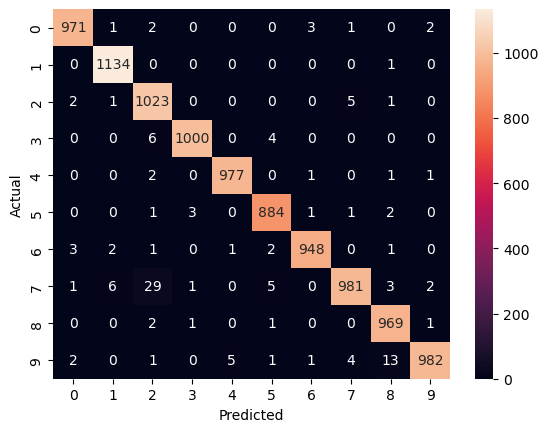

In [10]:
import numpy as np
# Confusion Matrix

# Generates output predictions for the input samples.
test_predictions = model.predict(x=x_test)

# Returns the indices of the maximum values along an axis.
test_predictions = np.argmax(test_predictions,axis=1) # the prediction outputs 10 values, we take the index number of the highest value, which is the prediction of the model

# generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predictions)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
h = sns.heatmap(confusion_matrix,annot=True,fmt='d')
h.set(xlabel='Predicted', ylabel='Actual')

In [11]:
pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
annotated-types              0.7.0
anyio                        4.6.0
archspec                     0.2.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
bokeh                        3.3.4
boltons                      24.0.0
Brotli                       1.1.0
cached-property              1.5.2
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.3.2
click                        8.1.7
cloudevents                  1.11.0
cloudpickle                  2.2.1
colorama                     0.4